In [21]:
import numpy as np
import gym

import typing
import quadruped_gym.gym
from quadruped_gym.core.types import RobotObservation
from quadruped_gym.gym.env_builder import A1BulletGymEnv
from quadruped_gym.quadruped import a1_pybullet
from quadruped_gym.quadruped.a1_pybullet.simulator import SimulationParameters  # noqa: F401

class Logger:

    def __init__(self):
        self.data = []

    def update(self, data: typing.Union[np.ndarray, RobotObservation]):
        self.data.append(data)

    def collate(self):
        if isinstance(self.data[0], np.ndarray):
            all_data = np.stack(self.data, axis=0)
        else:
            all_data = RobotObservation(
                base_position = np.stack([obs.base_position for obs in self.data]),
                base_velocity = np.stack([obs.base_velocity for obs in self.data]),
                base_orientation = np.stack([obs.base_orientation for obs in self.data]),
                base_rpy = np.stack([obs.base_rpy for obs in self.data]),
                base_rpy_rate = np.stack([obs.base_rpy_rate for obs in self.data]),
                motor_angles = np.stack([obs.motor_angles for obs in self.data]),
                motor_velocities = np.stack([obs.motor_velocities for obs in self.data]),
                motor_torques = np.stack([obs.motor_torques for obs in self.data]),
            )
        return all_data

class Controller:
    
    def get_action(self, time_step: int):
        pass     

def test_simulation_with_controller(simulator, controller, n_time_steps = 100, n_action_repeat = 30):
    obs_logger = Logger()
    act_logger = Logger()

    obs = simulator.reset()
    for i in range(n_time_steps):
        action = controller.get_action(i)
        obs_logger.update(obs)
        act_logger.update(action)
        obs = simulator.step(action, n_repeats = n_action_repeat)

    observation_history = obs_logger.collate()
    action_history = act_logger.collate()
    return observation_history, action_history

In [22]:
class LinearController(Controller):

    def __init__(self, 
        interpolation_timesteps = 50,
        init_pose = np.array([0, 0.67, -1.25] * 4),
        final_pose = np.array([0, 0.67, -1.8] * 4) 
    ) -> None:
        self.interpolation_timesteps = interpolation_timesteps
        self.init_pose = init_pose
        self.final_pose = final_pose
 
    def get_action(self, time_step: int):

        time_step = time_step % (2 * self.interpolation_timesteps)
        if time_step < self.interpolation_timesteps:
            action = (time_step / self.interpolation_timesteps) * self.final_pose \
                   + (1 - time_step / self.interpolation_timesteps) * self.init_pose
        else:
            time_step = time_step - self.interpolation_timesteps
            action = (time_step / self.interpolation_timesteps) * self.init_pose \
                   + (1 - time_step / self.interpolation_timesteps) * self.final_pose

        return action

In [23]:
simulator = a1_pybullet.A1PyBulletSimulator(
    sim_params=SimulationParameters(enable_rendering=False)
)
print(simulator.robot.quadruped)
print(simulator.robot._joint_name_to_id)
print(simulator.robot.motor_id_list)

for joint in simulator.robot.motor_id_list:
    joint_info = simulator._pybullet_client.getJointInfo(simulator.robot.quadruped, joint)
    print(joint_info)
del simulator

argv[0]=
1
{'floating_base': 0, 'imu_joint': 1, 'FR_hip_joint': 2, 'FR_thigh_joint': 3, 'FR_calf_joint': 4, 'FR_foot_fixed': 5, 'FL_hip_joint': 6, 'FL_thigh_joint': 7, 'FL_calf_joint': 8, 'FL_foot_fixed': 9, 'RR_hip_joint': 10, 'RR_thigh_joint': 11, 'RR_calf_joint': 12, 'RR_foot_fixed': 13, 'RL_hip_joint': 14, 'RL_thigh_joint': 15, 'RL_calf_joint': 16, 'RL_foot_fixed': 17}
[2, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
(2, b'FR_hip_joint', 0, 7, 6, 1, 0.0, 0.0, -0.802851455917, 0.802851455917, 20.0, 52.4, b'FR_hip', (1.0, 0.0, 0.0), (0.170269, -0.049186, -0.000515), (0.0, 0.0, 0.0, 1.0), 0)
(3, b'FR_thigh_joint', 0, 8, 7, 1, 0.0, 0.0, -1.0471975512, 4.18879020479, 55.0, 28.6, b'FR_thigh', (0.0, 1.0, 0.0), (0.003311, -0.084415, -3.1e-05), (0.0, 0.0, 0.0, 1.0), 2)b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frame
b3Printf: b3Warning[examples/Importer

In [24]:
simulator = a1_pybullet.A1PyBulletSimulator(
    sim_params=SimulationParameters(enable_rendering=False)
)
controller = LinearController(
    init_pose = np.array([0, 0.8, -1.6, 0, 0.8, -1.6, 0, 0.8, -1.6, 0, 0.8, -1.6,]),
    final_pose = np.array([0, 1.0, -2.0, 0, 1.0, -2.0, 0, 1.0, -2.0, 0, 1.0, -2.0,]) 
)

N_TIME_STEPS = 200
N_ACTION_REPEAT = 30
obs_hist, act_hist = test_simulation_with_controller(
    simulator, controller, n_time_steps= N_TIME_STEPS, n_action_repeat=N_ACTION_REPEAT)

del simulator

argv[0]=
b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frame
b3Printf: b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:

b3Printf: base


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


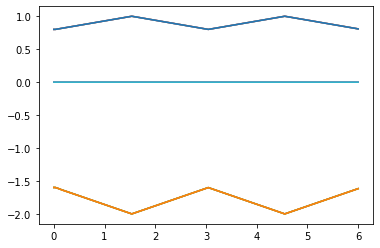

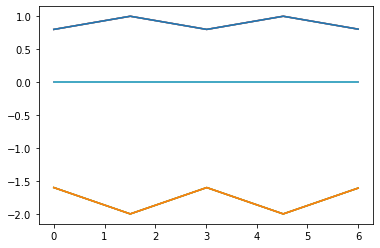

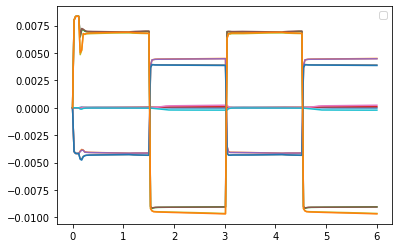

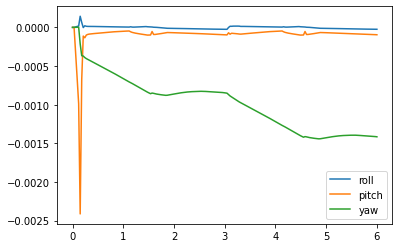

In [25]:
import matplotlib.pyplot as plt 

time = np.linspace(0, N_TIME_STEPS * N_ACTION_REPEAT * 0.001, N_TIME_STEPS)

plt.figure()
plt.plot(time, obs_hist.motor_angles)

plt.figure()
plt.plot(time, act_hist)

plt.figure()
for i in range(obs_hist.motor_angles.shape[1]):
    plt.plot(time, obs_hist.motor_angles[:,i] - act_hist[:,i])
plt.legend()

plt.figure()
for i in range(3):
    plt.plot(time, obs_hist.base_rpy[:,i], label = ['roll', 'pitch', 'yaw'][i])
plt.legend()